# Stop words

Words that occur frequently but not very informative

除了每個語言各自經過專家定義的 stop words，也可以根據情境、pre-research 來自行擴增 stop words 的內容。例如：<br/>
在 movie reviews dataset 中，我們可以排除 'film'、'movie'、'cinema' 等字詞 (因為可能很多 reviews 的開頭都是 this film...)

## Stop words 對文字雲的影響

![](Image/Image4.jpg)

左邊是有 stop words 的資料，可以發現 "film"、"br" 等詞 (br 代表換行符號) 很大，代表這些詞出現頻率很高。然而，"film" 是沒有意義的，更不用說 "br" 這個換行符號，因此可以認定這些屬於 stop words。

右邊是移除 stop words 的資料，可以看到 "film"、"br" 等詞都不見了

### 如何在建立 word cloud 時移除 stop words？

在 import WordCloud 函數時，也 import 一個 wordcloud 套件定義的預設 STOPWORDS list (這個STOPWORDS list 包含英文中的專家認定的 stopwords)

In [2]:
import matplotlib.pyplot as plt

In [9]:
# import libraries
from wordcloud import WordCloud, STOPWORDS

# Create our own set of stopwords
my_stopwords = set(STOPWORDS)
my_stopwords.update(["movie", "movies", "film", "films", "watch", "br"])    # 加入自己定義的詞

在建立 word cloud 時加入一個 stopwords 參數，這個參數要傳入一個包含所有 stop words 的 set (不重複出現)

In [10]:
import pandas as pd
reviews = pd.read_csv("Datasets/IMDB_sample.csv")
print(reviews.head())

   Unnamed: 0                                             review  label
0       18245  This short spoof can be found on Elite's Mille...      0
1       19801  A singularly unfunny musical comedy that artif...      0
2        3222  An excellent series, masterfully acted and dir...      1
3        6010  The master of movie spectacle Cecil B. De Mill...      1
4       16355  I was gifted with this movie as it had such a ...      0


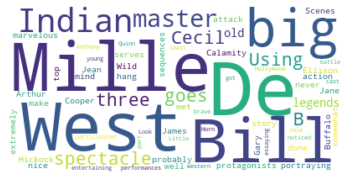

In [17]:
# Create a word cloud object
my_cloud = WordCloud(background_color = 'white', stopwords = my_stopwords).generate(reviews.review[3])

# Display the plot
plt.imshow(my_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

---

### 如何在建立 Bag-of-words 時移除 stop words？

在 import CountVectorizer 函數時，也 import 一個 sklearn 套件定義的預設 ENGLISH_STOP_WORDS set (這個STOPWORDS list 包含英文中的專家認定的 stopwords)

在 CountVectorizer 這個函數加入 stop_words 這個參數，並傳入 a set of stop words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

In [4]:
# Create our own set of stopwords
my_stop_words = ENGLISH_STOP_WORDS.union(["film", "movie", "cinema", "theatre"])

In [5]:
import pandas as pd
reviews = pd.read_csv("Datasets/IMDB_sample.csv")
print(reviews.head())

   Unnamed: 0                                             review  label
0       18245  This short spoof can be found on Elite's Mille...      0
1       19801  A singularly unfunny musical comedy that artif...      0
2        3222  An excellent series, masterfully acted and dir...      1
3        6010  The master of movie spectacle Cecil B. De Mill...      1
4       16355  I was gifted with this movie as it had such a ...      0


In [8]:
vect = CountVectorizer(stop_words = my_stop_words)
vect.fit(reviews.review)
X = vect.transform(reviews.review)

---

# Capturing a token pattern

這裡以 twitter 的資料來實踐

In [18]:
import pandas as pd
tweets = pd.read_csv("Datasets/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


可以發現 tweets 中的 text 包含很多數字和其他符號。有時我們在分析 sentiment 時，可能會希望 exclude 這些 digits 和 other characters。

## 如何只處理英文字母？

1. 可以用 str.isalpha()，如果 str 都是字母則回傳 true
2. 可以用 Regular Expression (re library)

補充：<br/>
str.isdigit() 如果 str 只有數字則回傳 true。<br/>
str.isalnum() 如果 str 只有數字和字母則回傳 true

### 用 isalpha() 來篩選 tokens


**原本的程式碼：**<br/>
前一章，我們要計算 reviews 的長度時，我們用 nltk 的 word_tokenize 來將 Amazon product reviews 轉換成 tokens，而且我們沒有篩選 tokens 的型態：

In [19]:
import pandas as pd

reviews = pd.read_csv("Datasets/amazon_reviews_sample.csv")
print(reviews.head())

   Unnamed: 0  score                                             review
0           0      1   Stuning even for the non-gamer: This sound tr...
1           1      1   The best soundtrack ever to anything.: I'm re...
2           2      1   Amazing!: This soundtrack is my favorite musi...
3           3      1   Excellent Soundtrack: I truly like this sound...
4           4      1   Remember, Pull Your Jaw Off The Floor After H...


In [20]:
from nltk import word_tokenize
word_tokens = [word_tokenize(review) for review in reviews.review]

# 計算每一個 review 的長度
length_of_review = []
for review in word_tokens:
    length_of_review.append(len(review))
print(length_of_review)

[87, 109, 165, 145, 109, 169, 168, 117, 113, 70, 43, 109, 66, 108, 151, 61, 135, 134, 83, 55, 87, 182, 187, 155, 65, 132, 120, 57, 119, 187, 112, 166, 67, 195, 38, 152, 129, 94, 48, 79, 69, 190, 38, 56, 25, 82, 132, 108, 55, 119, 52, 193, 108, 93, 55, 75, 85, 80, 29, 41, 86, 69, 126, 97, 78, 132, 99, 71, 84, 69, 82, 204, 55, 159, 132, 134, 142, 32, 30, 36, 143, 204, 63, 44, 29, 75, 36, 49, 131, 74, 114, 187, 78, 92, 49, 62, 36, 40, 35, 31, 18, 181, 95, 194, 46, 40, 134, 90, 59, 47, 215, 57, 45, 43, 33, 91, 74, 200, 166, 108, 108, 53, 37, 54, 122, 84, 91, 42, 31, 46, 45, 64, 70, 57, 177, 32, 144, 89, 78, 219, 103, 57, 99, 22, 114, 76, 198, 82, 88, 50, 94, 116, 122, 70, 68, 73, 158, 166, 167, 57, 96, 180, 179, 34, 63, 216, 48, 32, 109, 34, 58, 52, 35, 216, 47, 34, 29, 69, 106, 51, 97, 46, 94, 130, 157, 159, 26, 50, 77, 175, 191, 186, 82, 70, 47, 49, 89, 67, 64, 37, 135, 110, 101, 135, 24, 40, 46, 74, 126, 73, 68, 95, 163, 188, 100, 79, 98, 77, 114, 118, 133, 139, 44, 60, 83, 109, 68, 47,

---

**現在，我們試試看移除數字和特殊符號**

加入一行 **clean_tokens = [[token for token in review if token.isalpha()] for review in word_tokens]**

將原本的所有 tokens 移除不需要的 digits 和 other characters

In [21]:
from nltk import word_tokenize
word_tokens = [word_tokenize(review) for review in reviews.review]

# 加入這一行
clean_tokens = [[token for token in review if token.isalpha()] for review in word_tokens]

# 計算每一個 review 的長度
length_of_review = []
for review in clean_tokens:
    length_of_review.append(len(review))
print(length_of_review)

[78, 95, 124, 112, 87, 136, 138, 104, 102, 62, 35, 99, 59, 89, 131, 53, 115, 114, 72, 50, 68, 162, 159, 136, 53, 118, 102, 52, 97, 153, 94, 135, 54, 161, 31, 134, 114, 76, 36, 69, 60, 160, 33, 52, 22, 68, 112, 93, 47, 98, 43, 166, 94, 83, 50, 68, 63, 59, 25, 34, 74, 58, 110, 82, 68, 115, 88, 61, 76, 60, 65, 168, 47, 137, 117, 118, 123, 25, 23, 30, 130, 153, 48, 34, 27, 67, 31, 39, 100, 63, 95, 140, 56, 68, 38, 57, 29, 35, 31, 21, 16, 165, 80, 180, 40, 33, 119, 80, 47, 41, 175, 47, 37, 36, 27, 70, 68, 175, 146, 95, 89, 52, 33, 47, 99, 64, 75, 38, 30, 41, 42, 57, 57, 50, 142, 25, 127, 72, 69, 171, 83, 47, 84, 21, 99, 65, 167, 69, 72, 37, 80, 98, 95, 60, 58, 56, 140, 147, 138, 51, 80, 153, 147, 31, 54, 162, 40, 29, 100, 27, 48, 47, 25, 178, 36, 30, 25, 60, 88, 44, 75, 41, 72, 99, 132, 122, 25, 44, 68, 151, 161, 159, 73, 62, 42, 39, 78, 59, 57, 33, 111, 97, 87, 109, 20, 36, 40, 62, 95, 62, 55, 82, 142, 153, 88, 66, 87, 64, 86, 95, 116, 113, 36, 52, 69, 91, 55, 38, 49, 175, 37, 70, 57, 68, 

比較 word_tokens 和 clean_tokens 的差異，可以發現，光第一個 review 的長度就從 87 變成 78。

---

### Regular Expression

套用 re 這個套件 (詳情可參考 introduction to natural language processing in Python 的 *Regular expressions & word tokenization* 檔案

1. re.search() 搜尋一個 pattern 在一個 string 中第一次出現的位置
2. re.match() 搜尋一個 pattern 是否在 string 的第一個位置出現
3. re.findall() 搜尋所有 string 中符合 pattern 的所有字詞

例子：<br/>
假設有一個 hashtag，我想要擷取 "#" 以及 "#" 之後的第一個字母，可以用以下方式：

In [26]:
import re

my_hashtag = "#Wonderfulday"

pattern = r"#\w"

re.findall(pattern, my_hashtag)

['#W']

#### Regular Expression in CountVectorizer

CountVectorizer 可以加入一個 regular expression pattern 參數，用來 tokenization

假設今天有一個 pattern，要求至少要包含兩個以上的字母或數字 (**\w 包含所有字母、數字和下底線**)，同時要被 word boundaries 包含住 (\b)

In [27]:
pattern = r'\b\w\w+\b'

**這個就是 CountVectorizer 的 default pattern，CountVectorizer 會用這個 pattern tokenize 我們輸入的 strings)**

這個 pattern 會忽略 single-letter words，也會將 "don't" 或 "haven't" 等字分開

如果想要用不同的 pattern 來 tokenize strings，可以加入 token_pattern 這個參數，並傳入一個 pattern。例如：

    今天想要只包含字母 (**不包含特殊符號和數字**)，並只考慮由兩個和兩個以上的字母組成的詞，可以用以下方法 (**\W 為 \w 的反面**)

In [ ]:
vect = CountVectorizer(token_pattern = r"\b[^\d\W][^\d\W]+\b")

---

課堂練習一：<br/>
用不同的 token patterns 來 tokenize tweets data 中的 column "text"，並看看有什麼不同。

In [28]:
import pandas as pd
tweets = pd.read_csv("Datasets/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer

vect_origin = CountVectorizer().fit(tweets.text)
vect_adjusted = CountVectorizer(token_pattern = r"\b[^\d\W][^\d\W]+\b").fit(tweets.text)

In [30]:
# transforming
vect_origin.transform(tweets.text)
vect_adjusted.transform(tweets.text)

<14640x11893 sparse matrix of type '<class 'numpy.int64'>'
	with 227801 stored elements in Compressed Sparse Row format>

In [32]:
# Print out the length of each vectorizer
print('Length of vectorizer 1: ', len(vect_origin.get_feature_names()))
print('Length of vectorizer 2: ', len(vect_adjusted.get_feature_names()))

Length of vectorizer 1:  15051
Length of vectorizer 2:  11893


---

課堂練習二：練習 isalpha()、isdigit()、isalnum()

In [35]:
tweet_list = ["@VirginAmerica it's really aggressive to blast obnoxious 'entertainment' in your guests' faces &amp; they have little recourse",
             "@VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my flights added to my Elevate account. Help?",
             '@united Change made in just over 3 hours. For something that should have taken seconds online, I am not thrilled. Loved the agent, though.']

In [37]:
# Create a list of lists, containing the tokens from list_tweets
tokens = [word_tokenize(tweet) for tweet in tweet_list]

# Remove characters and digits , i.e. retain only letters
letters = [[word for word in item if word.isalpha()] for item in tokens]
# Remove characters, i.e. retain only letters and digits
let_digits = [[word for word in item if word.isalnum()] for item in tokens]
# Remove letters and characters, retain only digits
digits = [[word for word in item if word.isdigit()] for item in tokens]

# 檢視第三句話的 tokens 有什麼不一樣
print('Last item in alphabetic list: ', letters[2])
print('Last item in list of alphanumerics: ', let_digits[2])
print('Last item in the list of digits: ', digits[2])

Last item in alphabetic list:  ['united', 'Change', 'made', 'in', 'just', 'over', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in list of alphanumerics:  ['united', 'Change', 'made', 'in', 'just', 'over', '3', 'hours', 'For', 'something', 'that', 'should', 'have', 'taken', 'seconds', 'online', 'I', 'am', 'not', 'thrilled', 'Loved', 'the', 'agent', 'though']
Last item in the list of digits:  ['3']


---

---

---

# Stemming and lemmatization 將字詞還原

Stemming: 將字詞還原成 **root forms**

例如： <br/>
stays, staying, stayed --> stay <br/>
house, housing, houses --> hous <br/>
事實上，stemming 會將 '-ed', '-ing', '-er' 以及負數 '-s' 和所有格的字尾去除，就算去除之後的字詞不是一個正確的英文字也會去除。

可以透過 nltk 的 **PorterStemmer library** 實踐 (相當快)，也可以用 **SnowballStemmer** 來實現多種語言的 stemming

---

Lemmatization: 跟 stemming 很像，只是 lemmatization 後得到的原型字詞都是正確存在的英文字詞

例如： <br/>
stay, stays, staying, stayed --> stay <br/>
house, housing, houses --> house <br/>

可以透過 nltk 的 WordNetLemmatizer 實踐

---

Lemmatization vs Stemming

1. Stemming 的結果並不都是正確的字詞，因此如果要產生 actual words，要用 Lemmatization
2. Stemming 較為迅速，因為是直接刪掉字尾
3. Lemmatization 跟一個字詞的 part of speech 有關，要根據該字詞的 part of speech 詞性來做還原



**Stemming 例子**

PorterStemmer 用於英文

In [2]:
from nltk import PorterStemmer

porter = PorterStemmer()

porter.stem('wonderful')

'wonder'

SnowballStemmer 用於荷蘭文

In [4]:
from nltk.stem.snowball import SnowballStemmer

DutchStemmer = SnowballStemmer('dutch')
DutchStemmer.stem('beginnen')

'beginn'

試試看 stemming 一整句話

In [5]:
porter.stem("Today is a wonderful day!")

'today is a wonderful day!'

由結果可以發現沒有任何變化，是因為 PorterStemmer 物件只能傳入一個詞，不能是一句話。因此，在用 PorterStemmer 處理之前，要先將句子 tokenize (word_tokenize)

In [7]:
from nltk import word_tokenize
tokens = word_tokenize("Today is a wonderful day!")
stemmed_words = [porter.stem(word) for word in tokens]
stemmed_words

['today', 'is', 'a', 'wonder', 'day', '!']

**Lemmatization 例子**

WordNetLemmatizer: 使用 **Word Net database** 去還原字詞，因此需要 **import wordnet corpus** (存在 introduction to natural language processing in python 的 Corpus 內)

WordNetLemmatizer 物件的 lemmatize method 要加入一個參數 pos，告訴 lemmatizer 我要處理的文字的 part of speech (詞性) <br/>
   1. pos 預設為 'n': noun <br/>
   2.  'a': adj

In [10]:
import nltk
nltk.data.path.append('../Introduction to Natural Language Processing in Python/Corpus/nltk_wordnet/')

WNlemmatizer = WordNetLemmatizer()

WNlemmatizer.lemmatize("wonderful", pos = 'a')

'wonderful'

---

課堂練習三：比較 stemming 和 lemmatization 的運行時間差異

In [12]:
import nltk

GoT = 'Never forget what you are, for surely the world will not. Make it your strength. Then it can never be your weakness. Armour yourself in it, and it will never be used to hurt you.'

tokens = word_tokenize(GoT)

porter = PorterStemmer()
WNlemmatizer = WordNetLemmatizer()

In [23]:
import time

# Log the start time
start_time = time.time()

# Build a stemmed list
stemmed_tokens = [porter.stem(token) for token in tokens] 

# Log the end time
end_time = time.time()

print('Time taken for stemming in seconds: ', end_time - start_time)
print('Stemmed tokens: ', stemmed_tokens) 

Time taken for stemming in seconds:  0.0
Stemmed tokens:  ['never', 'forget', 'what', 'you', 'are', ',', 'for', 'sure', 'the', 'world', 'will', 'not', '.', 'make', 'it', 'your', 'strength', '.', 'then', 'it', 'can', 'never', 'be', 'your', 'weak', '.', 'armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'use', 'to', 'hurt', 'you', '.']


In [22]:
import time

# Log the start time
start_time = time.time()

# Build a lemmatized list
lem_tokens = [WNlemmatizer.lemmatize(token) for token in tokens]

# Log the end time
end_time = time.time()

print('Time taken for lemmatizing in seconds: ', end_time - start_time)
print('Lemmatized tokens: ', lem_tokens) 

Time taken for lemmatizing in seconds:  0.0
Lemmatized tokens:  ['Never', 'forget', 'what', 'you', 'are', ',', 'for', 'surely', 'the', 'world', 'will', 'not', '.', 'Make', 'it', 'your', 'strength', '.', 'Then', 'it', 'can', 'never', 'be', 'your', 'weakness', '.', 'Armour', 'yourself', 'in', 'it', ',', 'and', 'it', 'will', 'never', 'be', 'used', 'to', 'hurt', 'you', '.']


---

課堂練習四：多種語言的 stemming 練習

In [26]:
import pandas as pd
reviews = pd.read_csv("Datasets/amazon_reviews_sample.csv")
reviews.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [27]:
# Import the language detection package
import langdetect

# 得到所有 reviews 的語言
languages = [] 
for review in reviews.review:
    languages.append(langdetect.detect_langs(review))

# 保留語言的簡寫
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature 
reviews['language'] = languages

# Select the Spanish ones
Spanish_reviews = reviews[reviews.language == 'es']

In [29]:
# Import the required packages
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize

# 建立 SnowballStemmer 物件
SpanishStemmer = SnowballStemmer("spanish")

# 將每一句西文的 reviews tokenize
tokens = [word_tokenize(review) for review in Spanish_reviews.review] 

# Stem the list of tokens
stemmed_tokens = [[SpanishStemmer.stem(word) for word in review] for review in tokens]

# 印出第一個西文 review 的所有 tokens
print(stemmed_tokens[0])

['la', 'reencarn', 'vist', 'por', 'un', 'cientif', ':', 'el', 'prim', 'libr', 'del', 'dr.', 'weiss', 'sig', 'siend', 'un', 'gran', 'libr', 'par', 'tod', 'aquell', 'a', 'quien', 'les', 'inquiet', 'el', 'tem', 'de', 'la', 'reencarn', ',', 'asi', 'no', 'cre', 'en', 'ella', '.']


---

課堂練習五：stemming tweets 內的 text

In [30]:
tweets = pd.read_csv("Datasets/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [34]:
from nltk.stem import PorterStemmer
from nltk import word_tokenize

# 建立 PorterStemmer 物件
porter = PorterStemmer()

# Tokenize
tokens = [word_tokenize(tweet) for tweet in tweets.text]

# Stemming
Stemmed_tweet = [[porter.stem(token) for token in tweet] for tweet in tokens]

# 印出第一個 tweet 的 stemmed tokens
print(Stemmed_tweet[0])

['@', 'virginamerica', 'what', '@', 'dhepburn', 'said', '.']


---

---

---

# Tf-Idf (Term frequency- Inverse document frequency)

## Term Frequency

How often a given word appears within a document in the corpus

## Inverse Document Frequency

Log-ratio between the total number of documents and the number of documents that contain a specific word

### 公式

![](Image/Image5.jpg)

由此可見，當一個字在所有的 documents 都有出現 (Idf = 0)，代表該字沒有很 informative，可能是 stop words，因此可以用 Tf-Idf 的數值過濾掉 stop words (在這之前仍可以用之前提到的方法先移除一部分的 stop words)

## Tf-Idf 和 Bag-of-words 的差異

Tf-Idf 會考慮到一個詞在一個 document 的**出現頻率** (TF)，以及該詞在整個 corpus 中**出現在幾個 documents 中** (IDF)

Bag-of-words 只有考慮到一個詞在一個 document 的**出現次數**，並沒有考慮到一個 document 到底有多少個字，也沒有考慮到該字有沒有很常見

## Tf-Idf in Python

使用 sklearn 的 TfidfVectorizer 函數 (可加入的參數跟 CountVectorizer 都很像)

常用參數包含：
1. max_features: 最多要 extract 多少個 features
2. ngram_range: 要用 n-grams
3. stop_words: 傳入 stop words 的集合
4. token_pattern: 定義 token 應該符合的 pattern (regular expression)
5. max_df: 忽略出現的 document 數量超過這個值的 features
6. min_df: 忽略出現的 document 數量小於這個值的 features

回傳值一樣是一個 sparse matrix，要用 toarray() 加上 pd.DataFrame() 轉換回 dataframe

例子： tweets

In [35]:
import pandas as pd
tweets = pd.read_csv("Datasets/Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(max_features = 100).fit(tweets.text)
X = vect.transform(tweets.text)
X

<14640x100 sparse matrix of type '<class 'numpy.float64'>'
	with 119182 stored elements in Compressed Sparse Row format>

In [37]:
pd.DataFrame(X.toarray(), columns = vect.get_feature_names())

,about,after,again,airline,all,am,americanair,amp,an,and,...,was,we,what,when,why,will,with,would,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.668165,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.329040,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.431149,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.332355
4,0.494872,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.279754,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,0.000000,0.0,0.0,0.0,0.0,0.0,0.293653,0.000000,0.0,0.000000,...,0.0,0.402305,0.000000,0.0,0.0,0.0,0.0,0.0,0.268285,0.000000
14636,0.000000,0.0,0.0,0.0,0.0,0.0,0.181266,0.000000,0.0,0.000000,...,0.0,0.248334,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
14637,0.000000,0.0,0.0,0.0,0.0,0.0,0.487504,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
14638,0.000000,0.0,0.0,0.0,0.0,0.0,0.188272,0.000000,0.0,0.179597,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.344014,0.232585


---

課堂練習六：利用不同的參數來決定 tweets 的 text 的 features

In [39]:
# Import the required vectorizer package and stop words list
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Define the vectorizer and specify the arguments
my_pattern = r'\b[^\d\W][^\d\W]+\b'
vect = TfidfVectorizer(ngram_range=(1, 2), max_features=100, token_pattern=my_pattern, stop_words=ENGLISH_STOP_WORDS).fit(tweets.text)

# Transform the vectorizer
X_txt = vect.transform(tweets.text)

# Transform to a data frame and specify the column names
X=pd.DataFrame(X_txt.toarray(), columns=vect.get_feature_names())
X.head()

,aa,agent,airline,airport,americanair,amp,bag,baggage,bags,cancelled,...,ve,virginamerica,wait,waiting,want,way,weather,work,worst,yes
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.544485,0.531770,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.407271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.537247,0.0,0.0,0.0,0.0,...,0.000000,0.559828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.663756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

課堂練習七：利用 Amazon product reviews 比較 Bag-of-words 和 Tf-Idf 的結果

In [40]:
import pandas as pd
reviews = pd.read_csv("Datasets/amazon_reviews_sample.csv")
reviews.head()

,Unnamed: 0,score,review
0,0,1,Stuning even for the non-gamer: This sound tr...
1,1,1,The best soundtrack ever to anything.: I'm re...
2,2,1,Amazing!: This soundtrack is my favorite musi...
3,3,1,Excellent Soundtrack: I truly like this sound...
4,4,1,"Remember, Pull Your Jaw Off The Floor After H..."


In [43]:
# Import the required packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
vect1 = CountVectorizer(max_features=100).fit(reviews.review)
vect2 = TfidfVectorizer(max_features=100).fit(reviews.review)

# Transform the vectorizers
X1 = vect1.transform(reviews.review)
X2 = vect2.transform(reviews.review)
# Create DataFrames from the vectorizers 
X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.get_feature_names())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.get_feature_names())
X_df1.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,2,0,1,0,2,0,1
1,0,0,0,0,0,0,3,1,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,3,0,0,1,4,0,1,1,...,0,0,1,1,0,0,1,1,2,0
3,0,0,0,0,0,0,9,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,3,0,1,0,...,0,0,0,0,0,0,0,0,3,1


In [42]:
X_df2.head()

,about,after,all,also,am,an,and,any,are,as,...,what,when,which,who,will,with,work,would,you,your
0,0.0,0.000000,0.138970,0.0,0.0,0.00000,0.140823,0.000000,0.000000,0.000000,...,0.0,0.0,0.00000,0.351952,0.0,0.113371,0.000000,0.306757,0.000000,0.175024
1,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.191572,0.175388,0.116940,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.139101,0.106279,0.000000
2,0.0,0.000000,0.285009,0.0,0.0,0.10526,0.192539,0.000000,0.088148,0.090385,...,0.0,0.0,0.13013,0.120301,0.0,0.000000,0.139218,0.104853,0.160223,0.000000
3,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.554705,0.000000,0.112868,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.174214,0.000000,0.0,0.0,0.00000,0.197188,0.000000,0.120369,0.000000,...,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.328184,0.163385


可以發現 bag-of-words 的結果都是整數 (次數)，Tf-Idf 的結果都是小數 (頻率)